In [19]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.loader import DataLoader
from torch_geometric.utils import to_networkx
from sklearn.metrics import classification_report
from utils import Mydataset
from models import GCNClassifier

In [14]:
step_width = 32
nconf = 3 * step_width
t_sum = 1.0
prm_list = []
for i in range(nconf):
    t_sum += 1.0/step_width
    prm_list.append([t_sum, f"dataset/2d_Ising/L64/L64T{i}_"])
# print(prm_list)
# Temterature96 x conf50 = 4800 data

[[1.03125, 'dataset/2d_Ising/L64/L64T0_'], [1.0625, 'dataset/2d_Ising/L64/L64T1_'], [1.09375, 'dataset/2d_Ising/L64/L64T2_'], [1.125, 'dataset/2d_Ising/L64/L64T3_'], [1.15625, 'dataset/2d_Ising/L64/L64T4_'], [1.1875, 'dataset/2d_Ising/L64/L64T5_'], [1.21875, 'dataset/2d_Ising/L64/L64T6_'], [1.25, 'dataset/2d_Ising/L64/L64T7_'], [1.28125, 'dataset/2d_Ising/L64/L64T8_'], [1.3125, 'dataset/2d_Ising/L64/L64T9_'], [1.34375, 'dataset/2d_Ising/L64/L64T10_'], [1.375, 'dataset/2d_Ising/L64/L64T11_'], [1.40625, 'dataset/2d_Ising/L64/L64T12_'], [1.4375, 'dataset/2d_Ising/L64/L64T13_'], [1.46875, 'dataset/2d_Ising/L64/L64T14_'], [1.5, 'dataset/2d_Ising/L64/L64T15_'], [1.53125, 'dataset/2d_Ising/L64/L64T16_'], [1.5625, 'dataset/2d_Ising/L64/L64T17_'], [1.59375, 'dataset/2d_Ising/L64/L64T18_'], [1.625, 'dataset/2d_Ising/L64/L64T19_'], [1.65625, 'dataset/2d_Ising/L64/L64T20_'], [1.6875, 'dataset/2d_Ising/L64/L64T21_'], [1.71875, 'dataset/2d_Ising/L64/L64T22_'], [1.75, 'dataset/2d_Ising/L64/L64T23_'],

In [15]:
ndata = 50
T_cr = 2.27 # critical temp for 2d ising

img_dataset = []
temps = []
nprm = len(prm_list)
for itemp in range(nprm):
    temp = prm_list[itemp][0]
    fname = prm_list[itemp][1]
    for itrj in range(ndata):
        npsc = np.load(f"{fname}{itrj}.npy")
        if temp < T_cr:
            img_dataset.append((torch.tensor(npsc, dtype=torch.float32).unsqueeze(0), 0))
        else:
            img_dataset.append((torch.tensor(npsc, dtype=torch.float32).unsqueeze(0), 1))
        temps.append(temp)
train_data = img_dataset[0::2]
train_temps = temps[0::2]
val_data = img_dataset[1::2]
val_temps = temps[1::2]

train_graphset = Mydataset(train_data)
test_graphset = Mydataset(val_data)

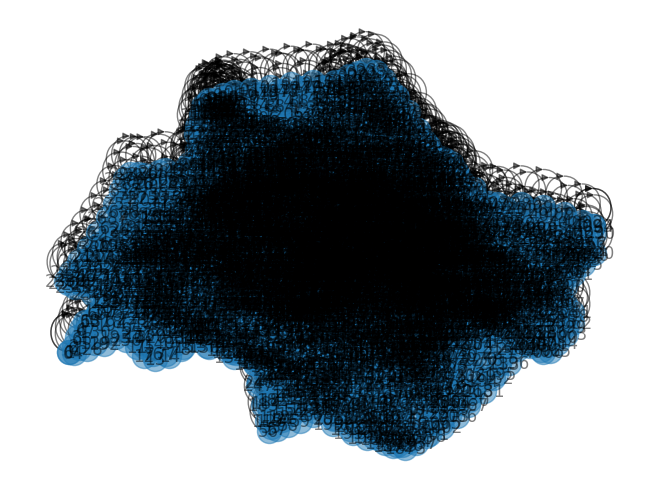

In [20]:
graph, label = train_graphset[0]
nxg = to_networkx(graph)
nx.draw(nxg,
        with_labels = True,
        alpha=0.5)

In [16]:
train_loader = DataLoader(train_graphset, batch_size=1000, shuffle=True)
valid_loader = DataLoader(test_graphset, batch_size=1000, shuffle=False)

In [17]:
device = 

model = GCNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [18]:
epochs = 5
losses = []
accuracy_list = []
for epoch in range(epochs):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.type(torch.long))
        loss.backward()
        del loss
        optimizer.step()
    
    model.eval()
    valid_loss = 0
    correct = 0
    answer = []
    prediction = []
    with torch.no_grad():
        for data, target in valid_loader:
            output = model(data)
            valid_loss += criterion(output, target.type(torch.long)).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            prediction += list(pred.cpu().numpy())
            answer += list(target.cpu().numpy())

    valid_loss /= len(valid_loader.dataset)
    accuracy = 100 * correct / len(valid_loader.dataset)
    losses.append(valid_loss)
    accuracy_list.append(accuracy)
    print(f'Epoch: {epoch+1}, Validation loss: {valid_loss}, Accuracy: {accuracy}%')
    print("Classification Report:\n", classification_report(
        answer, prediction, digits=4))
print("done.")
torch.save(model, "2d_Ising_model_GCNclassifier.pth")

Epoch: 1, Validation loss: 0.0007987004766861598, Accuracy: 58.333333333333336%
Classification Report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      1000
           1     0.5833    1.0000    0.7368      1400

    accuracy                         0.5833      2400
   macro avg     0.2917    0.5000    0.3684      2400
weighted avg     0.3403    0.5833    0.4298      2400



/Users/miyata/MCMC/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/miyata/MCMC/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/miyata/MCMC/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KeyboardInterrupt: 

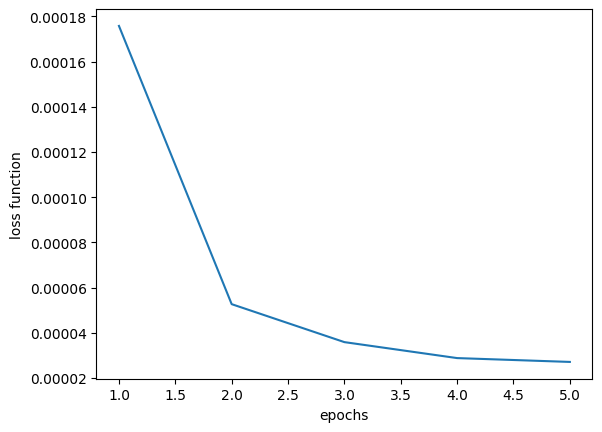

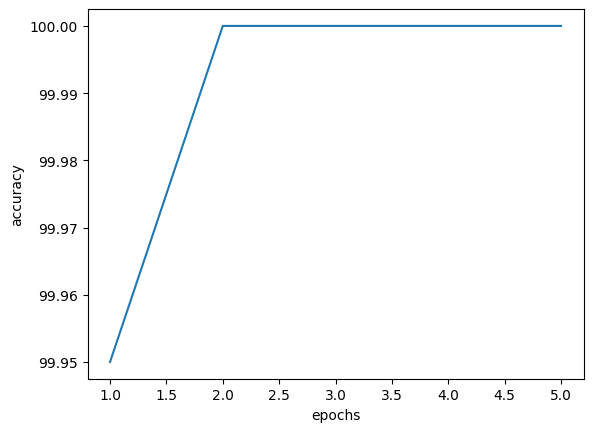

In [ ]:
plt.xlabel('epochs')
plt.ylabel('loss function')
plt.plot(np.arange(1, epochs+1), losses)
plt.show()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(np.arange(1, epochs+1), accuracy_list)
plt.show()

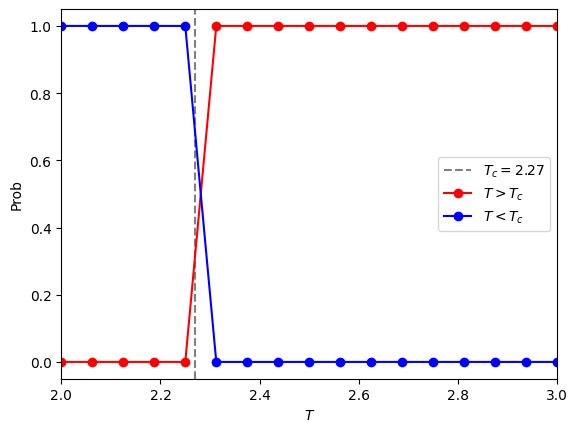

In [ ]:
xs = []
y1s = []
y2s = []
Ndatamax = 2000
Nsameclass = 25
for j in range(0, Ndatamax, Nsameclass):
    result = model(val_data[j:j+Nsameclass])
    x = val_temps[j]
    y1 = np.mean(result.argmax(dim=1, keepdim=True).detach().numpy().copy())
    y2 = 1 - np.mean(result.argmax(dim=1, keepdim=True).detach().numpy().copy())
    xs.append(x)
    y1s.append(y1)
    y2s.append(y2)
    # print(x, y1, y2)
plt.axvline(x=2.27, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c=2.27$")
plt.xlim(2,3)
plt.plot(xs, y1s, label=r"$T>T_c$", marker="o", color="red")
plt.plot(xs, y2s, label=r"$T<T_c$", marker="o", color="blue")
plt.legend()
plt.xlabel(r"$T$")
plt.ylabel(r"Prob")
plt.show()